In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Convolution2D,Flatten,MaxPool2D
from keras.utils import np_utils

In [3]:
ds = pd.read_csv("D:/Users/chira/Desktop/machine_learning/new_data/fashionmnist/fashionmnist/fashion-mnist_train.csv")
ds.shape

(60000, 785)

In [4]:
ds.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = ds.values[:,1:]/255.0
y = np_utils.to_categorical(ds.values[:,0])

print(X.shape,y.shape)

(60000, 784) (60000, 10)


In [11]:
split = int(0.8*X.shape[0])

X_train = X[:split].reshape((-1,28,28,1))
y_train = y[:split]

X_test = X[split:].reshape((-1,28,28,1))
y_test = y[split:]


print(X_train.shape,y_test.shape)

(48000, 28, 28, 1) (12000, 10)


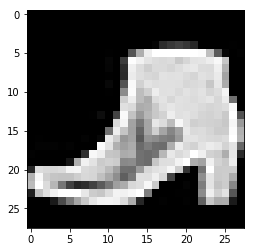

In [57]:
n_img = np.random.randint(low = 0,high = X.shape[1])

plt.imshow(X_train[n_img].reshape((28,28)),cmap='gray')

In [61]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape = (28,28,1)))
model.add(Activation('relu'))

model.add(Convolution2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(8,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 8)         0         
__________

In [62]:
hist = model.fit(X_train,y_train,
                epochs=100,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test,y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 19s 401us/step - loss: 0.9079 - acc: 0.6693 - val_loss: 0.5401 - val_acc: 0.7969
Epoch 2/100
48000/48000 [==============================] - 10s 216us/step - loss: 0.5722 - acc: 0.7856 - val_loss: 0.4690 - val_acc: 0.8297
Epoch 3/100
48000/48000 [==============================] - 11s 235us/step - loss: 0.5022 - acc: 0.8170 - val_loss: 0.4129 - val_acc: 0.8539
Epoch 4/100
48000/48000 [==============================] - 12s 255us/step - loss: 0.4719 - acc: 0.8280 - val_loss: 0.3931 - val_acc: 0.8611
Epoch 5/100
48000/48000 [==============================] - 12s 250us/step - loss: 0.4449 - acc: 0.8388 - val_loss: 0.3747 - val_acc: 0.8679
Epoch 6/100
48000/48000 [==============================] - 14s 285us/step - loss: 0.4258 - acc: 0.8451 - val_loss: 0.3626 - val_acc: 0.8721
Epoch 7/100
48000/48000 [==============================] - 12s 250us/step - loss: 0.4119 - acc: 0.8489 - val_l

Epoch 59/100
48000/48000 [==============================] - 9s 196us/step - loss: 0.2868 - acc: 0.8956 - val_loss: 0.2734 - val_acc: 0.9054
Epoch 60/100
48000/48000 [==============================] - 11s 225us/step - loss: 0.2884 - acc: 0.8962 - val_loss: 0.2675 - val_acc: 0.9058
Epoch 61/100
48000/48000 [==============================] - 12s 249us/step - loss: 0.2840 - acc: 0.8958 - val_loss: 0.2653 - val_acc: 0.9072
Epoch 62/100
48000/48000 [==============================] - 13s 278us/step - loss: 0.2867 - acc: 0.8961 - val_loss: 0.2634 - val_acc: 0.9090
Epoch 63/100
48000/48000 [==============================] - 11s 232us/step - loss: 0.2844 - acc: 0.8965 - val_loss: 0.2653 - val_acc: 0.9098
Epoch 64/100
48000/48000 [==============================] - 11s 223us/step - loss: 0.2842 - acc: 0.8972 - val_loss: 0.2646 - val_acc: 0.9083
Epoch 65/100
48000/48000 [==============================] - 11s 219us/step - loss: 0.2840 - acc: 0.8971 - val_loss: 0.2676 - val_acc: 0.9077
Epoch 66/100
4

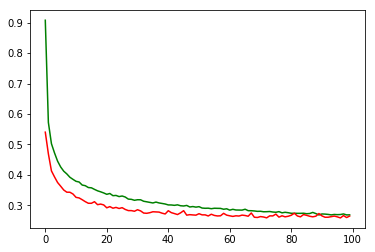

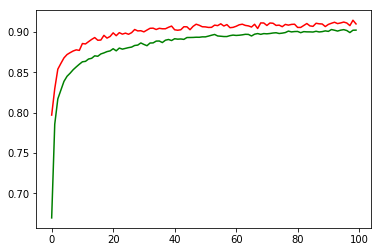

In [64]:
history = hist.history

plt.figure(0)
plt.plot(history['loss'],'g')
plt.plot(history['val_loss'],'r')

plt.figure(1)
plt.plot(history['acc'],'g')
plt.plot(history['val_acc'],'r')